# Deep Learning from scratch
### chapter 2

### 퍼셉트론

퍼셉트론 : 다수의 신호를 입력으로 받아 신호를 출력


*   노드(뉴런): 퍼셉트론의 기본 단위로, 하나 이상의 입력을 받아 처리한 후 결과를 출력하는 역할을 한다. 일정한 임계값을 넘어서면 활성화되어 출력 신호를 보내는 역할을 한다

*   가중치(Weights): 입력 각각에 부여되는 계수로, 입력의 중요도 또는 영향력을 조절한다. 퍼셉트론은 이러한 가중치를 학습을 통해 조절하며, 각 입력 신호가 결과에 미치는 영향력을 결정짓는다.

*   임계값(Threshold) 또는 바이어스(Bias): 노드가 활성화되기 위해 넘어야 하는 값이다. 모든 입력에 가중치를 곱한 후 그 합이 이 임계값을 초과할 때 노드가 활성화되고, 그렇지 않으면 활성화되지 않는다.





### AND 게이트
*  AND 게이트: 입력은 둘이고 출력은 하나 -> 두 입력이 모두 1일때만 1을 출력, 그 외에는 0 출력
*  진리표: 입력신호와 출력신호의 대응표
    *  (w1, w2, θ) 가 (0.5, 0.5, 0.7), (0.5, 0.5, 0.8), (1.0, 1.0, 1.0) 일때and 게이트 조건 만족(두개의 노드의 입력신호가 1 이상이여야만 임계값을 넘기 때문)

### NAND 게이트와 OR 게이트


*   NAND 게이트: Not AND 이며 AND 게이트의 출력과 반대(둘다 1이여야만 0을 출력)
    *   (w1, w2, θ) 가 (-0.5, -0.5, -0.7) 등의 조합이 있음 (AND 게이트를 충족하는 매개변수 부호를 뒤집어주면 됨)
*  OR 게이트: 입력 신호준 하나 이상이 1이면 1을 출력
    *   (w1, w2, θ) 가 (0.5 0.5 0.3) 등의 조합이 있음

*기계학습에서의 학습은 퍼셉트론에서의 '매개변수' 값을 정하는 작업*

### 퍼셉트론 간단한 구현

In [15]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2+w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

In [2]:
AND(0, 0) #0
AND(1, 0) #0
AND(0, 1) #0
AND(1, 1) #1

1

### 가중치와 편향 도입
기존의 θ를 -b 로 식을 아래와 같이 변형할 수 있다. 여기서 b를 편향이라한다.

*   y = 0(b+w1x1 + w2x2 <= 0)
*   y = 1(b+w1x1 + w2x2 >= 0)



In [3]:
import numpy as np
x = np.array([0, 1]) #입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 #편향
w*x

array([0. , 0.5])

In [5]:
np.sum(w*x) + b

-0.19999999999999996

### 가중치와 편향 구현하기

In [14]:
#NAND 게이트 구현
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

#OR 게이트 구현
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

### XOR 게이트
XOR 게이트는 배타적 논리합이라는 논리회로로, x1, x2 중 한쪽이 1일 때만 1을 출력함.

하지만 지금까지의 퍼셉트론으로는 XOR 게이트 구현이 불가능함.
식을 그래프로 나타내면 직선의 방정식으로, 직선으로 나뉜 두 영역를 구함. 하지만 x1, x2 중 한쪽이 1일 때와 둘다 0, 1 인 부분을 나누는건 불가능함.


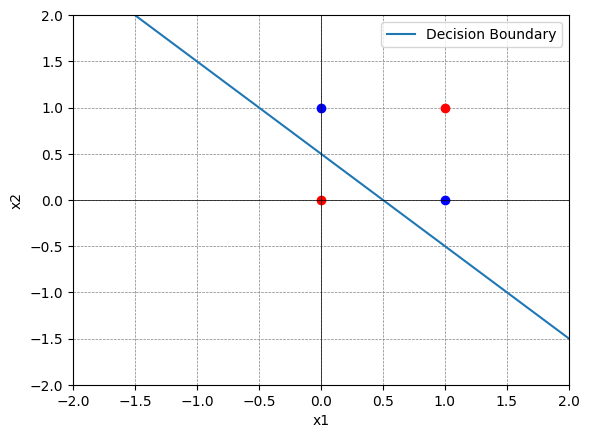

In [9]:
import matplotlib.pyplot as plt

# 가중치 설정
w1, w2 = 1, 1  # 예시 가중치
bias = -0.5

x1 = np.linspace(-2, 2, 100)
x2 = (-bias - w1*x1) / w2

points_red = np.array([[1, 1], [0, 0]])  # y = 1 (빨간색 점)
points_blue = np.array([[1, 0], [0, 1]])  # y = 0 (파란색 점)
plt.plot(x1, x2, label='Decision Boundary')

# y = 1에 해당하는 점들을 빨간색으로 표시
for point in points_red:
    plt.plot(point[0], point[1], 'ro')

# y = 0에 해당하는 점들을 파란색으로 표시
for point in points_blue:
    plt.plot(point[0], point[1], 'bo')

# 그래프 설정 재적용
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

위 그래프를 빨간점은 빨간점끼리, 파란점은 파란점끼리 영역을 나눠야하지만 불가능함

### 선형 & 비선형
위 처럼 직선으로 나눈 영역을 선형영역, 곡선으로 나눈 영역은 비선형 영역이라함

### 기존 게이트 조합하기
XOR 게이트는 게이트끼리 층을 쌓아서 구현이 가능함.


*  x1의 입력신호와 x2입력신호를 AND, OR 게이트가 각각 따로 받고, 이 두개의 게이트에서 나온 결과를 다시 NAND 게이트에 입력하면 XOR 게이트 구현이 가능하다.
*  이런 구조를 다층구조의 네트워크라하며, 입력 노드는 0층, NAND, OR 게이트 단계는 1층, AND 게이트는 이라 부르며, 구현한 XOR 게이트는 2층 퍼셉트론 이다.
*  즉 단층 퍼셉트론으로는 표현하지 못한 것을 층을 늘려 구현이 가능하다.


### XOR 게이트 구현하기

In [18]:
#XOR 게이트
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [20]:
print (XOR(0, 0), XOR(0, 1), XOR(1, 0), XOR(1, 1))

0 1 1 1


### 정리


*  퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
*  퍼셉트론에서는 ‘가중치’와 ‘편향’을 매개변수로 설정한다.
*  퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.
*  XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
*  2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
*  단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
*  다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.
